<a href="https://colab.research.google.com/github/Shouvik-7/Pytorch_examples/blob/main/imageclassification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
df = pd.read_csv('/content/fmnist_small.csv')

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [ ]:
df.shape

(6000, 785)

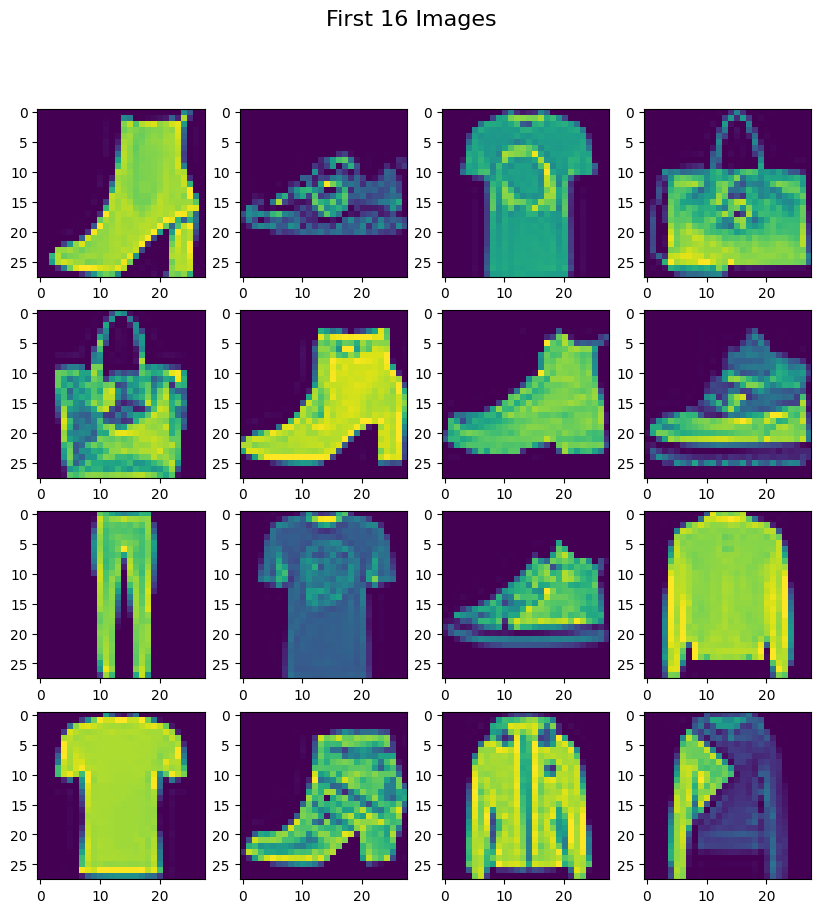

In [ ]:
# Create a 4x4 grid of images

fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle('First 16 Images', fontsize=16)

for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)

In [ ]:
# Train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32).reshape(-1,1,28,28)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index], self.labels[index]

In [ ]:
train_dataset = CustomDataset(X_train, y_train)

In [ ]:
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=True, pin_memory=True)

In [ ]:
class MyNN(nn.Module):
  def __init__(self, input_features):
    super().__init__()
    self.features = nn.Sequential(
        nn.Conv2d(input_features, 32, kernel_size=3, padding='same'),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(32,64, kernel_size=3, padding='same'),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64*7*7, 128),
        nn.ReLU(),
        nn.Dropout(p=0.4),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)

    return x

In [ ]:
learning_rate = 0.01
epochs = 100

In [ ]:
model = MyNN(1)

model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 1e-4)

In [ ]:
# trainingloop


for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # backpass
    optimizer.zero_grad()
    loss.backward()

    # update grad
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()


  avg_loss =total_epoch_loss/len(train_loader)

  print(f"Epoch:{epoch+1}, Loss:{avg_loss}")



Epoch:1, Loss:1.1998835225900015
Epoch:2, Loss:0.6413481295108795
Epoch:3, Loss:0.5200009894371033
Epoch:4, Loss:0.4350504537423452
Epoch:5, Loss:0.3780344897508621
Epoch:6, Loss:0.32752709433436394
Epoch:7, Loss:0.29773234417041144
Epoch:8, Loss:0.2622809237241745
Epoch:9, Loss:0.23315040722489358
Epoch:10, Loss:0.1942909392962853
Epoch:11, Loss:0.17840183439354101
Epoch:12, Loss:0.15103725435833137
Epoch:13, Loss:0.13346904326230288
Epoch:14, Loss:0.11444009015957514
Epoch:15, Loss:0.09461652673780918
Epoch:16, Loss:0.08395710314934453
Epoch:17, Loss:0.0775449885862569
Epoch:18, Loss:0.05890715654318531
Epoch:19, Loss:0.0515219392751654
Epoch:20, Loss:0.049457550983255105
Epoch:21, Loss:0.04639277130365372
Epoch:22, Loss:0.03752012853510678
Epoch:23, Loss:0.030167150671283404
Epoch:24, Loss:0.02753692797385156
Epoch:25, Loss:0.02586451927665621
Epoch:26, Loss:0.022627380467019974
Epoch:27, Loss:0.020101771182380615
Epoch:28, Loss:0.016588246379978955
Epoch:29, Loss:0.0138670484380175

In [ ]:
 model.eval()

MyNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8716666666666667


In [ ]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

1.0


Single image prediction

In [ ]:
img_1 = torch.tensor(df.iloc[0,1:].values, dtype=torch.float32).reshape(-1,1,28,28).to(device)

r = model(img_1)

In [ ]:
r.argmax()

tensor(9, device='cuda:0')

In [ ]:
df.iloc[0]['label']

9

Transfer learning

In [ ]:

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
df = pd.read_csv('/content/fmnist_small.csv')

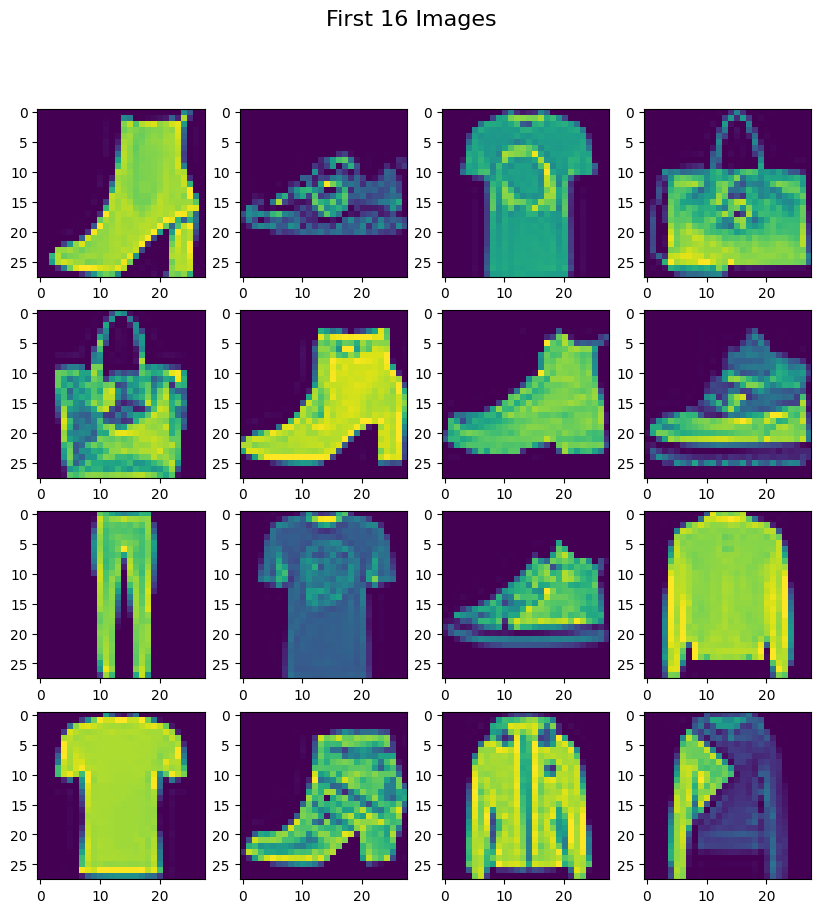

In [ ]:
# Create a 4x4 grid of images

fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle('First 16 Images', fontsize=16)

for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)

In [ ]:
# Train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# transformations
from torchvision.transforms import transforms

custom_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
from PIL import Image
import numpy as np

class CustomDataset(Dataset):

  def __init__(self, features, labels, transform):
    self.features = features
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):

    # resize to (28, 28)
    image = self.features[index].reshape(28,28)

    # change datatype to np.uint8
    image = image.astype(np.uint8)

    # change black&white to color -> (H,W,C) -> (C,H,W)
    image = np.stack([image]*3, axis=-1)

    # convert array to PIL image
    image = Image.fromarray(image)

    # apply transforms
    image = self.transform(image)

    # return
    return image, torch.tensor(self.labels[index], dtype=torch.long)

In [ ]:
train_dataset = CustomDataset(X_train, y_train, transform=custom_transform)

In [ ]:
test_dataset = CustomDataset(X_test, y_test, transform=custom_transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [ ]:
# fetch the pretrained model

import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 99.6MB/s]


In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in vgg16.features.parameters():
  param.requires_grad=False

In [ ]:
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 10)
)

In [ ]:
vgg16 = vgg16.to(device)

In [ ]:
learning_rate = 0.01
epochs = 100

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=learning_rate)

In [ ]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = vgg16(batch_features)

    print(outputs.shape)
    print(batch_labels.shape)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

    break

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


torch.Size([32, 10])
torch.Size([32])
Epoch: 1 , Loss: 0.01517095406850179
torch.Size([32, 10])
torch.Size([32])
Epoch: 2 , Loss: 0.07863577524820964
torch.Size([32, 10])
torch.Size([32])
Epoch: 3 , Loss: 0.0269612185160319
torch.Size([32, 10])
torch.Size([32])
Epoch: 4 , Loss: 0.021309820810953777
torch.Size([32, 10])
torch.Size([32])
Epoch: 5 , Loss: 0.015273529688517253
torch.Size([32, 10])
torch.Size([32])
Epoch: 6 , Loss: 0.017370452880859377
torch.Size([32, 10])
torch.Size([32])
Epoch: 7 , Loss: 0.01661571502685547
torch.Size([32, 10])
torch.Size([32])
Epoch: 8 , Loss: 0.015948875745137533
torch.Size([32, 10])
torch.Size([32])
Epoch: 9 , Loss: 0.015909457206726076
torch.Size([32, 10])
torch.Size([32])
Epoch: 10 , Loss: 0.01642309824625651
torch.Size([32, 10])
torch.Size([32])
Epoch: 11 , Loss: 0.01564003308614095
torch.Size([32, 10])
torch.Size([32])
Epoch: 12 , Loss: 0.01527731418609619
torch.Size([32, 10])
torch.Size([32])
Epoch: 13 , Loss: 0.015352187156677246
torch.Size([32, 

In [ ]:
model.eval()

MyNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = vgg16(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.09666666666666666
